## Data Preprocessing and Cleaning

#### Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the dataset

In [2]:
data = pd.read_csv('zomato.csv')
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
data.shape

(51717, 17)

In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Dropping unnecessary columns

In [5]:
data = data.drop(['url','address','dish_liked','phone','reviews_list','menu_item','listed_in(city)'], axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


#### Renaming columns for ease of reference

In [6]:
data.rename(columns = {'rate':'rating', 'approx_cost(for two people)':'cost_for_two', 
                       'listed_in(type)':'meal_type'}, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rating        43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   cost_for_two  51371 non-null  object
 9   meal_type     51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


#### Dropping duplicate rows

In [8]:
data.duplicated().sum()

16706

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(35011, 10)

#### Removing null rows

In [11]:
data.isnull().sum()

name               0
online_order       0
book_table         0
rating          3770
votes              0
location          14
rest_type        156
cuisines          33
cost_for_two     221
meal_type          0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(30958, 10)

#### Cleaning 'rating' column

In [14]:
data['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
data['rating'] = data['rating'].str.replace("/5","")
data['rating'] = data['rating'].str.replace(" /5","")
data['rating'] = data['rating'].replace("NEW", np.nan)
data['rating'] = data['rating'].replace("-", np.nan)
data['rating'] = data['rating'].astype(float)

In [16]:
data['rating'].isnull().sum()

1320

In [17]:
data['rating'].mean()

3.732849719954085

In [18]:
data['rating'].fillna(3.7, inplace = True)

In [19]:
data['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

#### Cleaning 'cost_for_two' column 

In [20]:
data['cost_for_two'] = data['cost_for_two'].str.replace(",","")
data['cost_for_two'] = data['cost_for_two'].astype(float)

In [21]:
data['cost_for_two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

#### Cleaning 'rest_type' column

In [22]:
rest_type = data['rest_type'].value_counts(ascending=False)
rest_type

Quick Bites                   10143
Casual Dining                  7311
Cafe                           2495
Dessert Parlor                 1357
Delivery                       1117
                              ...  
Bakery, Food Court                2
Bakery, Beverage Shop             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [23]:
rest_type_new = rest_type[rest_type < 300]
rest_type_new

Fine Dining                   266
Casual Dining, Cafe           250
Pub, Casual Dining            218
Sweet Shop                    218
Beverage Shop, Quick Bites    168
                             ... 
Bakery, Food Court              2
Bakery, Beverage Shop           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 73, dtype: int64

In [24]:
def rest_type(value):
    if value in rest_type_new:
        return 'Others'
    else:
        return value

data['rest_type'] = data['rest_type'].apply(rest_type)
data['rest_type'].value_counts()

Quick Bites           10143
Casual Dining          7311
Others                 3864
Cafe                   2495
Dessert Parlor         1357
Delivery               1117
Takeaway, Delivery      965
Casual Dining, Bar      940
Bakery                  547
Bar                     456
Beverage Shop           417
Food Court              376
Bar, Casual Dining      349
Lounge                  312
Pub                     309
Name: rest_type, dtype: int64

#### Cleaning 'location' column

In [25]:
location = data['location'].value_counts(ascending=False)
location

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Kengeri                     5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [26]:
location_new = location[location < 100]
location_new

Race Course Road                 93
Majestic                         92
Yeshwantpur                      88
Hennur                           86
Varthur Main Road, Whitefield    85
ITPL Main Road, Whitefield       83
Infantry Road                    81
HBR Layout                       77
Kaggadasapura                    73
Vijay Nagar                      66
CV Raman Nagar                   63
Sadashiv Nagar                   57
City Market                      56
RT Nagar                         54
Sanjay Nagar                     48
Sahakara Nagar                   47
Koramangala 2nd Block            44
South Bangalore                  44
Hosur Road                       39
East Bangalore                   27
Magadi Road                      24
Jalahalli                        23
Sankey Road                      20
Kanakapura Road                  19
Old Madras Road                  18
Koramangala                      17
Mysore Road                      17
Langford Town               

In [27]:
def loc_type(value):
    if value in location_new:
        return 'Others'
    else:
        return value
    
data['location'] = data['location'].apply(loc_type)
data['location'].value_counts()

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
Others                   1536
Marathahalli             1415
JP Nagar                 1221
Jayanagar                1154
Bellandur                1001
Electronic City           937
Bannerghatta Road         907
Sarjapur Road             838
Brigade Road              653
Koramangala 7th Block     604
Koramangala 6th Block     580
Brookefield               548
Koramangala 4th Block     548
MG Road                   538
Kalyan Nagar              530
Malleshwaram              519
Ulsoor                    513
Banashankari              502
Koramangala 1st Block     472
New BEL Road              472
Church Street             440
Basavanagudi              431
Residency Road            407
Frazer Town               401
Rajajinagar               390
Lavelle Road              386
Old Airport Road          366
Kammanahalli              351
Richmond R

#### Cleaning 'cuisines' column

In [28]:
cuisines = data['cuisines'].value_counts(ascending=False)
cuisines

North Indian                                       1602
North Indian, Chinese                              1401
South Indian                                        902
Bakery, Desserts                                    471
Biryani                                             429
                                                   ... 
Fast Food, Sandwich, Salad, Healthy Food              1
Beverages, South Indian                               1
South Indian, Fast Food, North Indian, Desserts       1
Chinese, Thai, Pan Asian                              1
Biryani, Kebab, Kerala                                1
Name: cuisines, Length: 2487, dtype: int64

In [29]:
cuisines_new = cuisines[cuisines < 100]
cuisines_new

Cafe, Desserts                                     99
Bakery, Fast Food                                  98
North Indian, Fast Food                            98
North Indian, Chinese, South Indian                94
North Indian, Continental                          91
                                                   ..
Fast Food, Sandwich, Salad, Healthy Food            1
Beverages, South Indian                             1
South Indian, Fast Food, North Indian, Desserts     1
Chinese, Thai, Pan Asian                            1
Biryani, Kebab, Kerala                              1
Name: cuisines, Length: 2442, dtype: int64

In [30]:
def cuis_type(value):
    if value in cuisines_new:
        return 'Others'
    else:
        return value

data['cuisines']= data['cuisines'].apply(cuis_type)
data['cuisines'].value_counts()

Others                                              18965
North Indian                                         1602
North Indian, Chinese                                1401
South Indian                                          902
Bakery, Desserts                                      471
Biryani                                               429
South Indian, North Indian, Chinese                   414
Cafe                                                  405
Desserts                                              377
Fast Food                                             374
Ice Cream, Desserts                                   289
Chinese                                               285
Bakery                                                276
Mithai, Street Food                                   237
Chinese, North Indian                                 217
North Indian, Chinese, Biryani                        201
Desserts, Ice Cream                                   195
Finger Food   

## Data Visualization and Analysis

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   book_table    30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost_for_two  30958 non-null  float64
 9   meal_type     30958 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.6+ MB


In [32]:
data.corr()

,rating,votes,cost_for_two
rating,1.000000,0.448952,0.408659
votes,0.448952,1.000000,0.379895
cost_for_two,0.408659,0.379895,1.000000


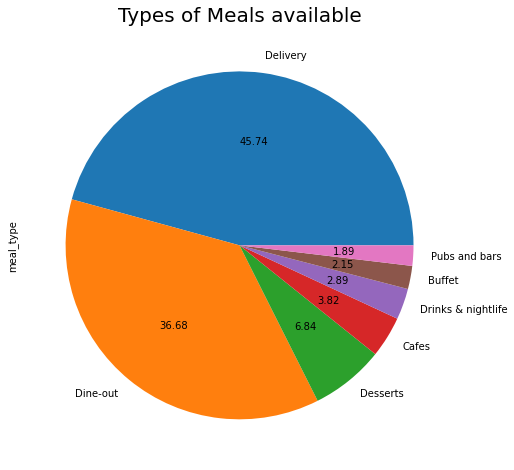

In [33]:
plt.figure(figsize = (8,8))
data['meal_type'].value_counts().plot(kind='pie', autopct="%.2f")
plt.title('Types of Meals available', size=20)
plt.show()

Food Delivery is the most preferred option available. Dine-out, desserts and cafe systems are also in demand.

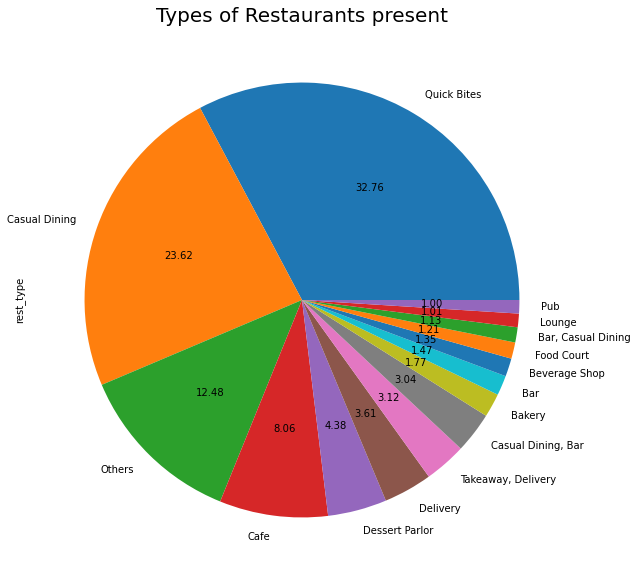

In [34]:
plt.figure(figsize = (10,10))
data['rest_type'].value_counts().plot(kind='pie', autopct="%.2f")
plt.title('Types of Restaurants present', size=20)
plt.show()

Quick Bites and Casual Dining restaurants are in very good numbers. Cafes are also somewhat popular. 
People tend to go to places where they can grab a bite in no time, in the midst of their busy schedule or so.

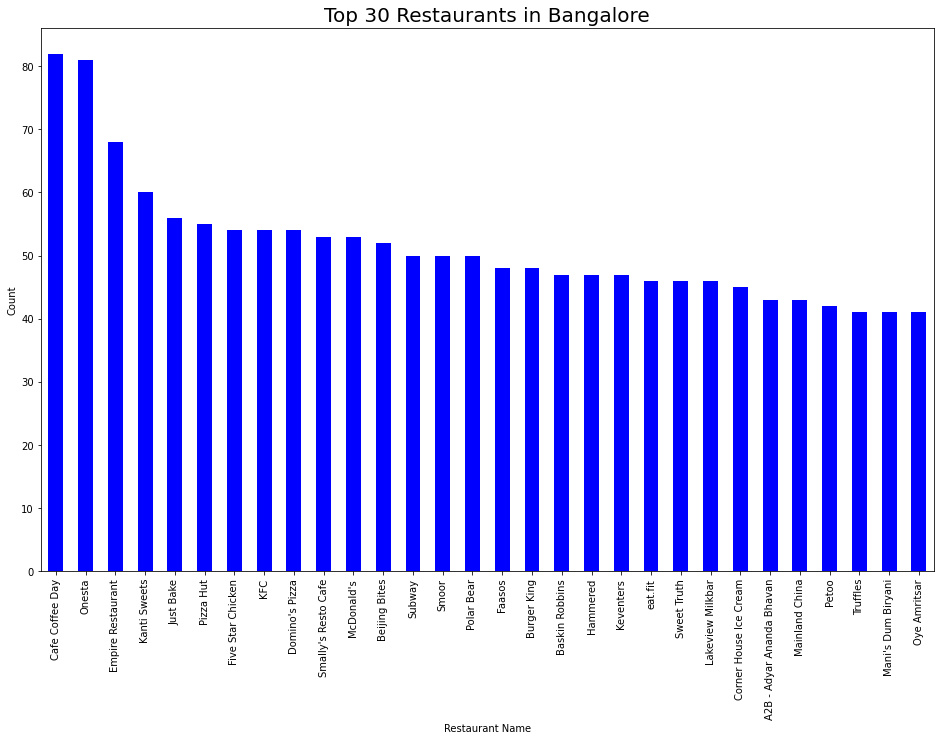

In [35]:
top30 = data['name'].value_counts()[:30]

plt.figure(figsize=(16,10))
ax = top30.plot(kind='bar', color='blue')
plt.title('Top 30 Restaurants in Bangalore', size=20)
plt.xlabel("Restaurant Name")
plt.ylabel('Count')
plt.show()

Cafe Coffee Day and Onesta are the most go-to restaurants.

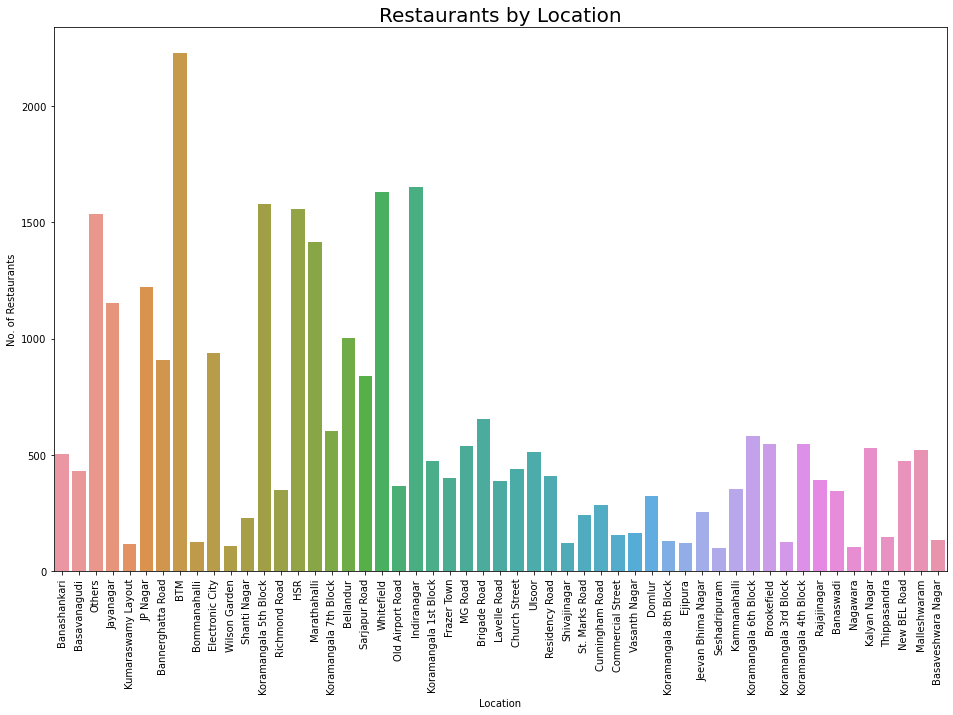

In [36]:
plt.figure(figsize = (16,10))
sns.countplot(x = 'location', data = data)
plt.xticks(rotation = 90)
plt.title('Restaurants by Location', size=20)
plt.xlabel("Location")
plt.ylabel('No. of Restaurants')
plt.show()

BTM locality has the most number of restaurants, followed by Indiranagar and Whitefield. The Koramangala blocks, HSR, Marathahalli and JP Nagar are quite suitable for opening new restaurants; they are less competitive and populous at the same time.

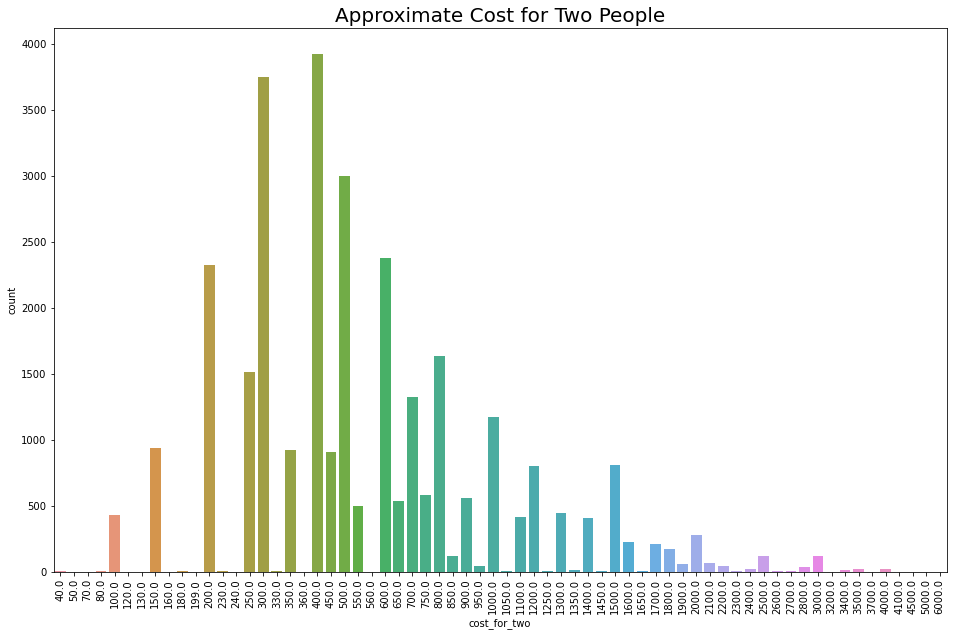

In [37]:
plt.figure(figsize = (16,10))
sns.countplot(x = 'cost_for_two', data = data)
plt.xticks(rotation=90)
plt.title('Approximate Cost for Two People', size=20)
plt.show()

The approximate cost for two people is around Rs. 300.

Text(0.5, 1.0, 'Online Order facility')

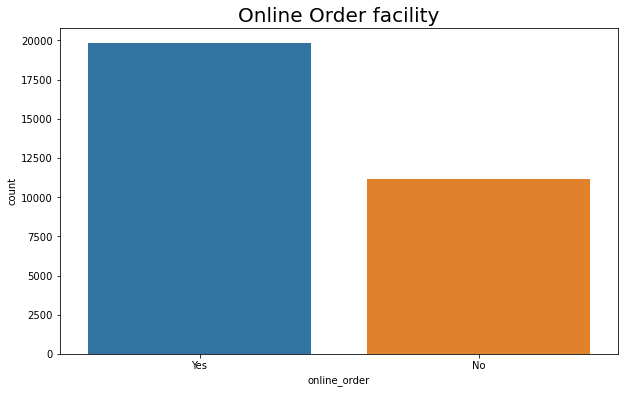

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'online_order', data = data)
plt.title('Online Order facility', size=20)

Many restaurants provide online order facility.

Text(0.5, 1.0, 'Table Booking facility')

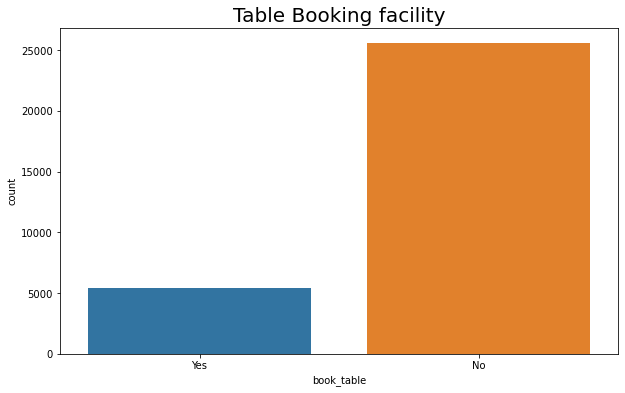

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'book_table', data = data)
plt.title('Table Booking facility', size=20)

Very less restaurants provide table booking facility.

Text(0.5, 1.0, 'Rating on the basis of Online Order facility')

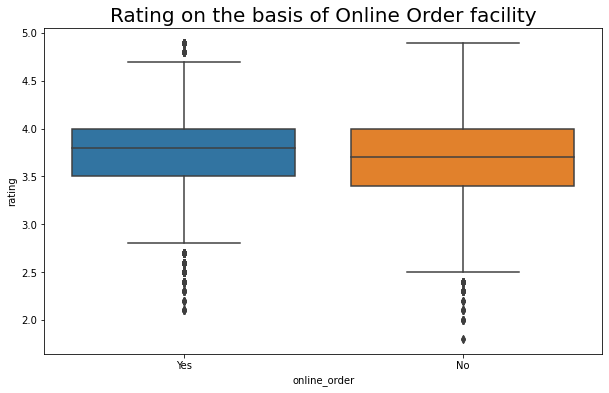

In [40]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'online_order', y = 'rating', data = data)
plt.title('Rating on the basis of Online Order facility', size=20)

Restaurants with online ordering facility have slightly better ratings, but there is not much difference.

Text(0.5, 1.0, 'Rating on the basis of Table Booking facility')

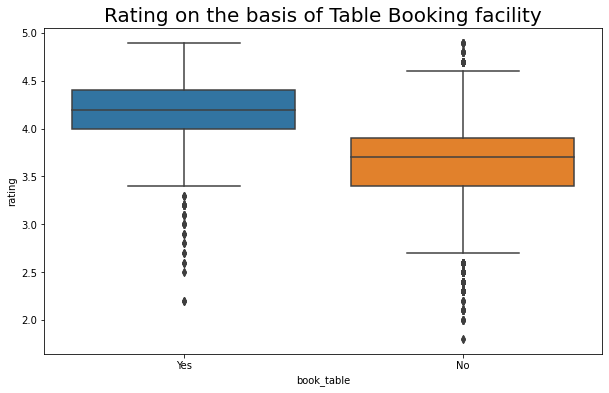

In [41]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'book_table', y = 'rating', data = data)
plt.title('Rating on the basis of Table Booking facility', size=20)

Restaurants with table booking facility have better ratings.

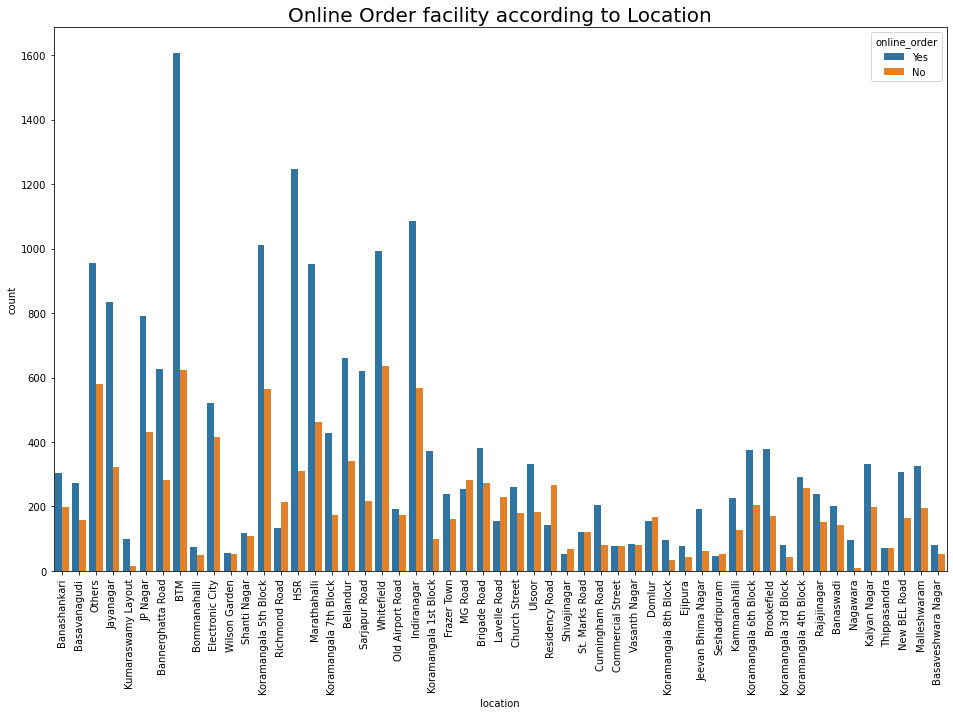

In [42]:
plt.figure(figsize=(16,10))
sns.countplot(x='location', hue='online_order', data=data)
plt.xticks(rotation=90)
plt.title('Online Order facility according to Location', size=20)
plt.show()

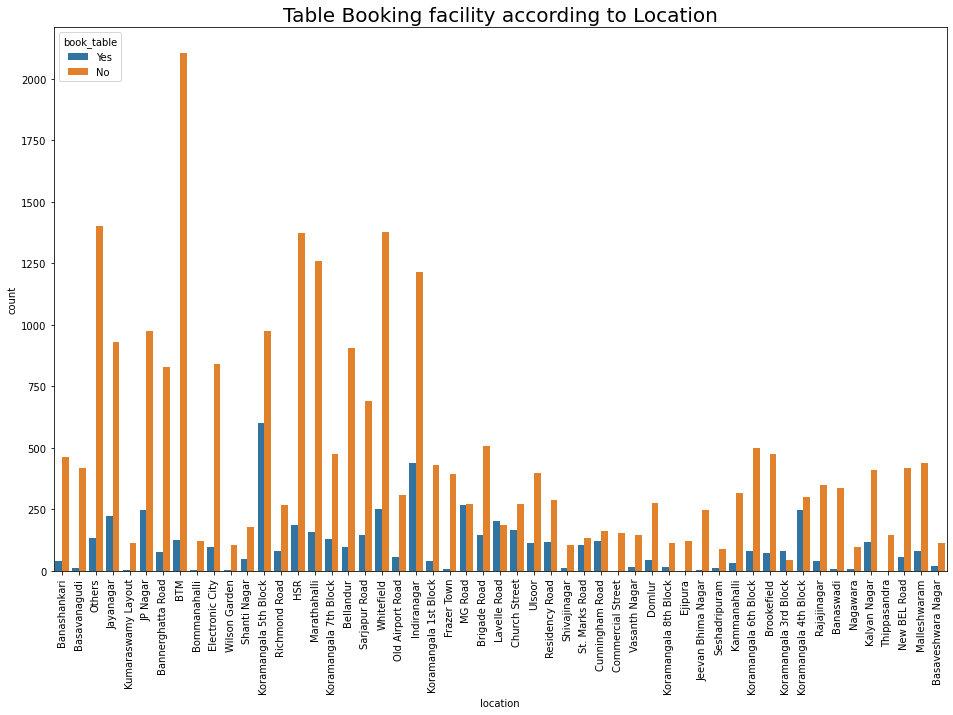

In [43]:
plt.figure(figsize=(16,10))
sns.countplot(x='location', hue='book_table', data=data)
plt.xticks(rotation=90)
plt.title('Table Booking facility according to Location', size=20)
plt.show()

Text(0.5, 1.0, 'Rating on the basis of Meal Type available')

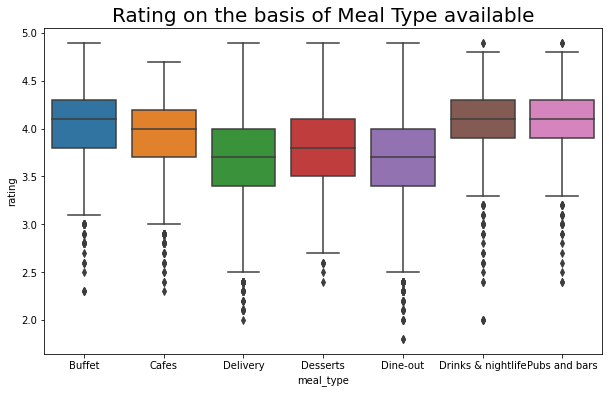

In [44]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'meal_type', y = 'rating', data = data)
plt.title('Rating on the basis of Meal Type available', size=20)

Buffets, drinks, pubs and bars have higher ratings. Cafes and desserts also have good ratings.

Text(0.5, 1.0, 'Average Rating of Bangalore Restaurants')

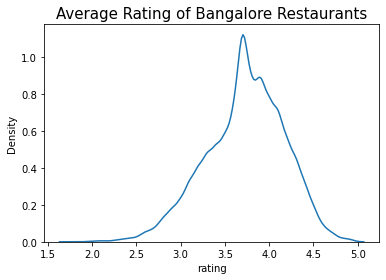

In [45]:
sns.kdeplot(x = 'rating', data = data)
plt.title('Average Rating of Bangalore Restaurants', size=15)

The average rating of Bangalore restaurants is 3.7.

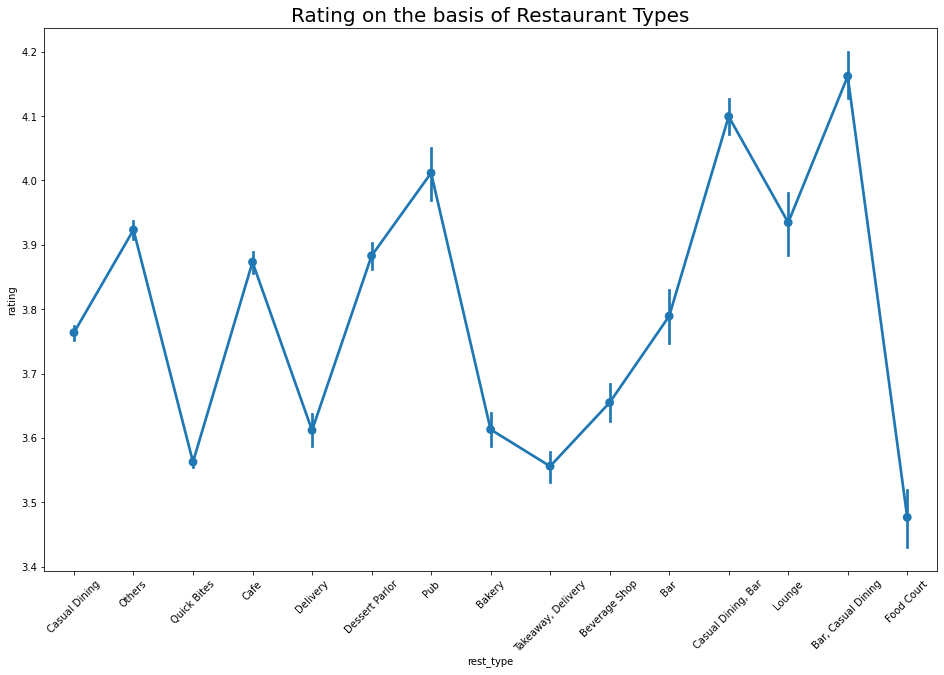

In [46]:
plt.figure(figsize=(16,10))
sns.pointplot(x='rest_type', y='rating', data=data)
plt.xticks(rotation=45)
plt.title('Rating on the basis of Restaurant Types', size=20)
plt.show()

Casual dinings, pubs, bars and lounges have high ratings.

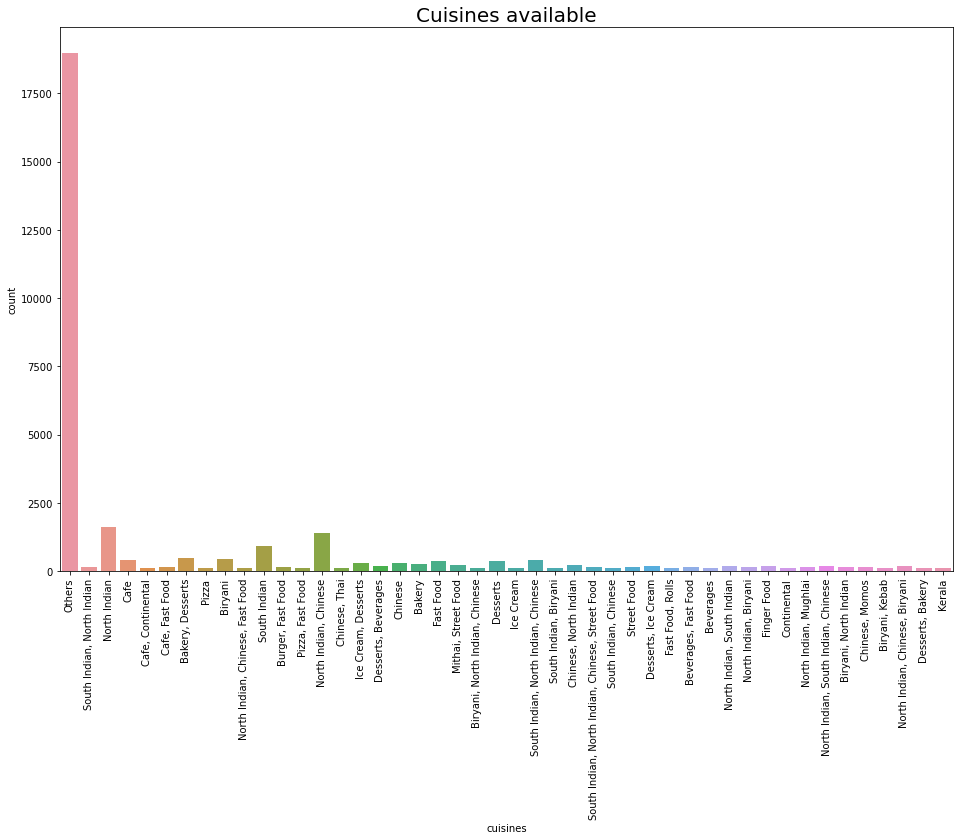

In [47]:
plt.figure(figsize = (16,10))
sns.countplot(x = 'cuisines', data = data)
plt.xticks(rotation=90)
plt.title('Cuisines available', size=20)
plt.show()

North Indian, South Indian, Chinese, Bakery and Desserts are the most in-demand cuisines.

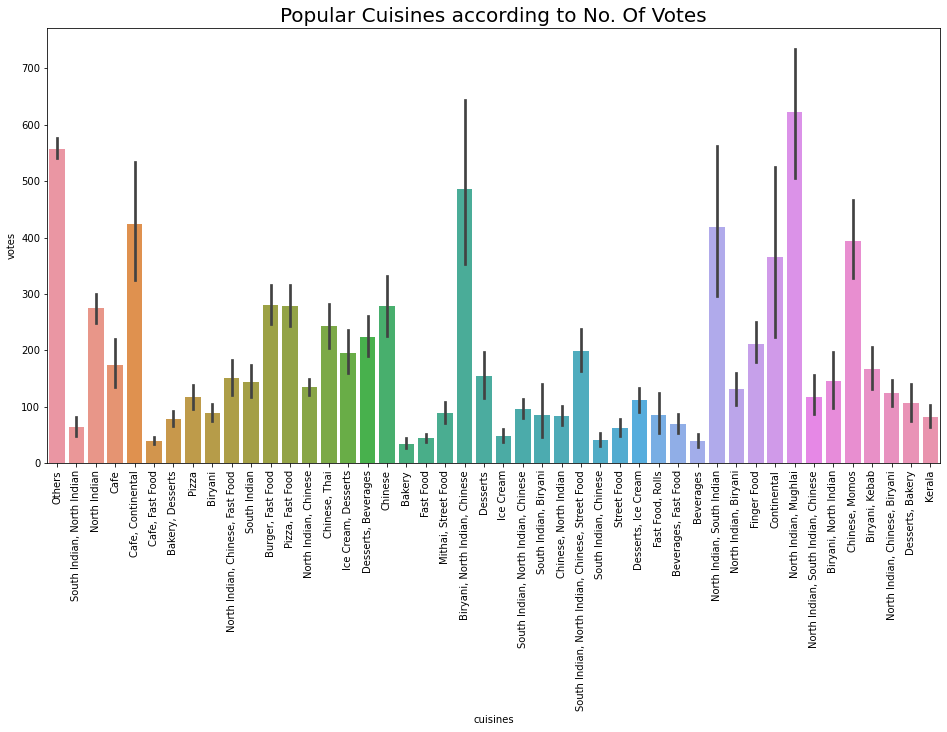

In [48]:
plt.figure(figsize = (16, 8))
sns.barplot(x='cuisines', y='votes', data=data)
plt.xticks(rotation=90)
plt.title('Popular Cuisines according to No. Of Votes', size=20)
plt.show()

North Indian, Biryani, Chinese, Cafe, Continental, Mughlai, South Indian, Momos are the most loved by people.

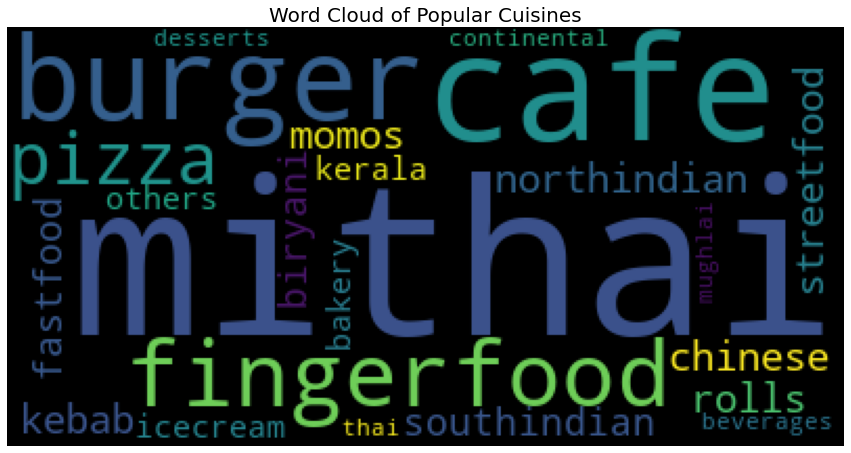

In [50]:
from wordcloud import WordCloud,STOPWORDS

data['cuisines'] = data['cuisines'].str.replace(" ","")
cuisines_list = [j.lower().strip() for i in data['cuisines'] for j in i.split(',')]

plt.figure(figsize=(15,10))
cuisines_set = set(cuisines_list)
cuisines_wc = ', '.join(cuisines_set)
wc = WordCloud(stopwords=STOPWORDS, max_words=len(cuisines_wc))
wc.generate(cuisines_wc)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Popular Cuisines', size=20)
plt.imshow(wc)
plt.show()

### As depicted from our visualizations, to open a new restaurant, we can choose locations like Indiranagar, Whitefield, Koramangala blocks, Marathahalli, etc; they are somewhat less competitive and populous too. We can opt for cuisines like North Indian, Chinese, South Indian, Continental and mainly Desserts. Setting up a Quick Bite eatery or a Cafe would be a plus point. Food costs around 150-200 rupees per person would be optimal.